<a href="https://colab.research.google.com/github/Arbues/PAM_proyect/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow
###Tensor:
Matrix multidimensional que tiene la capacidad de ejecutarse en la gpu
Ejemplo de un tensor en diferentes dimensiones:
![](https://i.imgur.com/cWtTjDh.png)

# Redes Neuronales
### Importaciones y carga de datos:

In [20]:
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
model=keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(10),
    ]
)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

### Analisis de los datos:
Comprederemos la estructura y las características de los datos con los que estás trabajando antes de realizar cualquier análisis o entrenar un modelo de aprendizaje automático.

In [21]:
import pandas as pd

# Crear un DataFrame para mostrar la información
data = {
    'Variable': ['x_train', 'y_train', 'x_test', 'y_test'],
    'Tipo de Dato': [type(x_train), type(y_train), type(x_test), type(y_test)],
    'Forma': [x_train.shape, y_train.shape, x_test.shape, y_test.shape],
    'Tipo de Datos': [x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype],
    'Máximo Valor': [x_train.max(), y_train.max(), x_test.max(), y_test.max()]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Variable,Tipo de Dato,Forma,Tipo de Datos,Máximo Valor
0,x_train,<class 'numpy.ndarray'>,"(60000, 28, 28)",uint8,255
1,y_train,<class 'numpy.ndarray'>,"(60000,)",uint8,9
2,x_test,<class 'numpy.ndarray'>,"(10000, 28, 28)",uint8,255
3,y_test,<class 'numpy.ndarray'>,"(10000,)",uint8,9


Observaremos quue cada numero escrito a mano esta representado por una matrix 28*28:


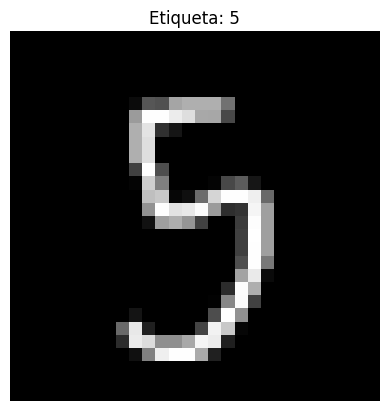

In [22]:
import random
random_index = random.randint(0, len(x_train) - 1)

# Muestra la imagen correspondiente al índice seleccionado
plt.imshow(x_train[random_index], cmap='gray')  # cmap='gray' muestra la imagen en escala de grises
plt.title(f"Etiqueta: {y_train[random_index]}")  # Muestra la etiqueta correspondiente a la imagen
plt.axis('off')  # Desactiva los ejes
plt.show()

Nesecitamos convertir esta matrix a un vector para que pueda ingresar a nuestro imput layer y que este este cada numero en el rango del 0-1 (Normalizacion),esto es debido a que si el numero que pasa por la layers puede ser relativamente alto y puede desbordarse o requerir mas esfuerzo computacional.

In [23]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0
print(x_train.shape)

(60000, 784)


### Secuential API (one input_layer - one output_layer:)
####Arquitectura:
Usamos el metodo Sequential para crear la arquitectura del modelo, un
modelo de red neuronal con tres capas: dos capas ocultas con activación ReLU y una capa de salida sin activación (lineal) con 10 neuronas
#### Con relu como funcion de activacion en las capas ocultas:

In [24]:
model=keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(10),
    ]
)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


####Con tanh como funcion de activacion en las 2 capas ocultas y usando otro metodo de instanciar el modelo:

In [25]:
inputs=keras.Input(shape=(28*28))
x=layers.Dense(512,activation='tanh')(inputs) #capa siguiente de inputs
x=layers.Dense(256,activation='tanh')(x) #capa superpuesta de la anterior
outputs=layers.Dense(10,activation='softmax')(x) # ultima capa superpuesta a la anterior
model2=keras.Model(inputs=inputs,outputs=outputs) # se instancia el modelo definiendo los inputs y outputs

####Compilacion:
Compilaremos el modelo de red neuronal antes de entrenarlo. En esta etapa, se configuran aspectos clave del proceso de entrenamiento, como la función de pérdida, el optimizador y las métricas para evaluar el rendimiento del modelo durante el entrenamiento

In [26]:
model.compile(
    #Funcion adecuada para problemas de clasificacion
    #Sparse para ya no aplicar el hot encoding
    #True porque indica que los datos llegan al final de la capa sin aplicar la funcion softmax
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #Se utiliza el optimizador Adam y el learning rate indica que tanto cambia los parametros en busca de un minimo
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [27]:
model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),# false porque el modelo2 su output tiene la f.acticacion softmax
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), #momentum es para acelerar la convergencia
    metrics=["accuracy"],
)


#### Entrenamiento:

El código `model.fit()` se utiliza para entrenar un modelo de red neuronal con los siguientes parámetros:

- `x_train` y `y_train` son los datos de entrenamiento (imágenes y etiquetas).
- `batch_size=32` indica que se actualizarán los pesos después de procesar lotes de 32 muestras a la vez(asi analizar el cambio de parametros de un subconjunto y no del general).
- `epochs=5` especifica que se realizarán 5 épocas(cantidad de veces que el modelo se entrena con todo el conjunto) completas de entrenamiento.
- `verbose=2` muestra información sobre precisión y pérdida en cada época.


In [28]:
model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.1869 - accuracy: 0.9430 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 14s - loss: 0.0767 - accuracy: 0.9758 - 14s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 15s - loss: 0.0538 - accuracy: 0.9824 - 15s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.0423 - accuracy: 0.9867 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 16s - loss: 0.0325 - accuracy: 0.9895 - 16s/epoch - 8ms/step


In [29]:
model2.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.2942 - accuracy: 0.9126 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 12s - loss: 0.1434 - accuracy: 0.9575 - 12s/epoch - 6ms/step
Epoch 3/5
1875/1875 - 13s - loss: 0.0978 - accuracy: 0.9704 - 13s/epoch - 7ms/step
Epoch 4/5
1875/1875 - 15s - loss: 0.0734 - accuracy: 0.9776 - 15s/epoch - 8ms/step
Epoch 5/5
1875/1875 - 14s - loss: 0.0573 - accuracy: 0.9826 - 14s/epoch - 7ms/step


#### Evaluacion:

Se evalua el modelo en los datos de testeo (datos nunca antes vistos) y observamos su accuracy

In [30]:
model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 2s - loss: 0.0722 - accuracy: 0.9813 - 2s/epoch - 7ms/step


[0.07223618775606155, 0.9812999963760376]

In [31]:
model2.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 2s - loss: 0.0735 - accuracy: 0.9768 - 2s/epoch - 6ms/step


[0.07348205894231796, 0.9768000245094299]

## Evaluación de un Modelo de Clasificación con Métricas

En este ejemplo, se muestra cómo evaluar un modelo de clasificación en TensorFlow y Keras utilizando diferentes métricas, como precisión, recuperación y puntuación F1. Esto se hace utilizando la función `classification_report` de scikit-learn.

1. Se realizan predicciones en el conjunto de datos de prueba utilizando el modelo entrenado.
2. Las predicciones de probabilidad se convierten en etiquetas de clase.
3. Se genera un informe de clasificación que incluye métricas detalladas para cada clase en el conjunto de datos de prueba.

Este enfoque proporciona una visión detallada del rendimiento del modelo en la tarea de clasificación, ayudando a evaluar su capacidad para predecir correctamente las etiquetas de clase.


In [32]:
from sklearn.metrics import classification_report

# Predecir las clases en el conjunto de datos de prueba
y_pred = model.predict(x_test)

# Convertir las predicciones de probabilidad en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Generar el informe de clasificación
report = classification_report(y_test, y_pred_classes)

# Imprimir el informe de clasificación
print(report)


313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Analisis de errores:
observaremos los digitos en el que el modelo se equivoco y analizaremos su fue un error grande o no.

313/313 [==============================] - 1s 3ms/step


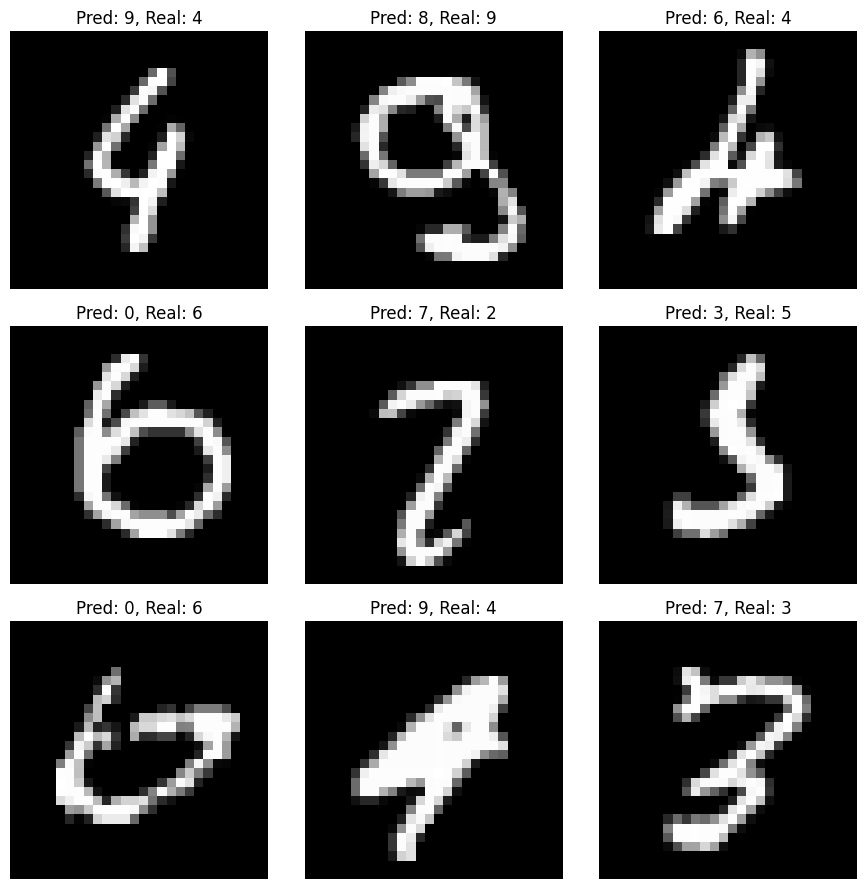

In [33]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Identificar los índices donde las predicciones fueron incorrectas
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Número de imágenes mal clasificadas a mostrar
num_images_to_show = 9

# Crear subplots
plt.figure(figsize=(9, 9))

for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[index]}, Real: {y_test[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 5ms/step


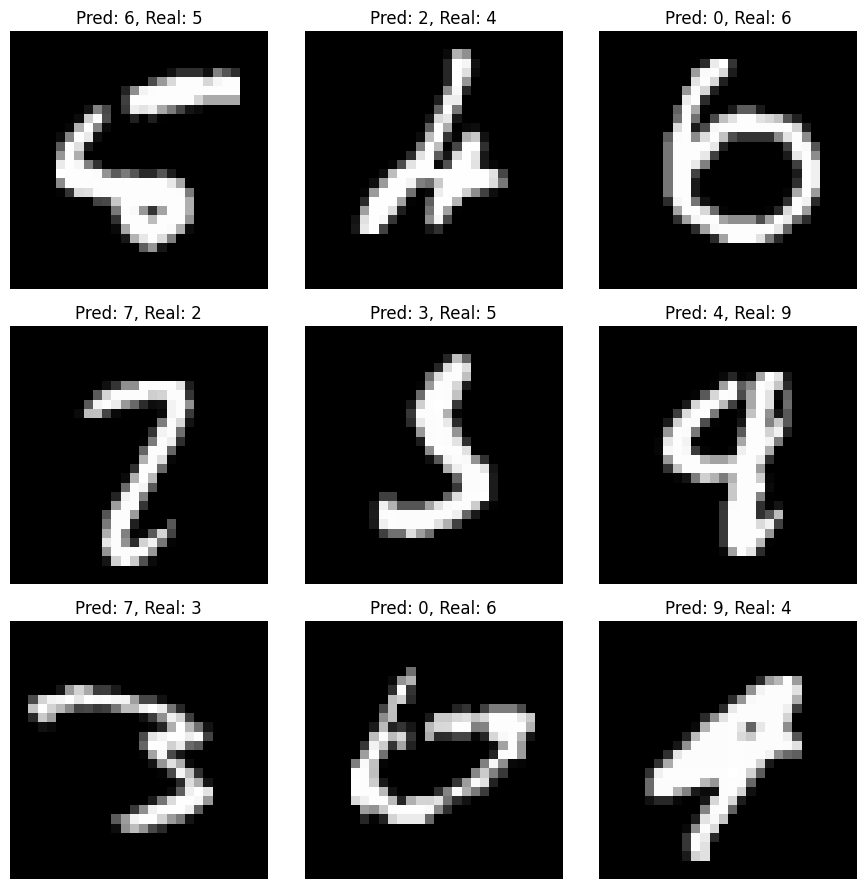

In [34]:
predictions = model2.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Identificar los índices donde las predicciones fueron incorrectas
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Número de imágenes mal clasificadas a mostrar
num_images_to_show = 9

# Crear subplots
plt.figure(figsize=(9, 9))

for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[index]}, Real: {y_test[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [35]:
model.save("clf_entrenado_tSFL1.h5")
model2.save("clf_entrenado_tSFL2.h5")

C:\Users\kikhe\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
